In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import preprocessing

# **Dataset Import**

In [93]:
train_dataset = "../Train/Final_Train.csv"
dataset = pd.read_csv(train_dataset) 
dataset

,Unnamed: 0,MOFnumber,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,...,metal_type,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio,CO2_working_capacity [mL/g]
0,0,1,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,...,Zn,2,54.0,1.800000,6.666667,21.000000,0.306667,1.044267,0.095238,105.284502
1,1,2,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,...,Ba,2,105.0,1.478873,2.816901,35.000000,0.237113,0.846289,0.000000,101.224774
2,2,3,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,...,Cu,2,47.0,1.566667,6.666667,14.000000,0.195122,0.661463,0.142857,118.987011
3,3,4,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,...,V,4,100.0,1.785714,7.142857,11.500000,0.205357,0.706429,0.000000,187.626004
4,4,5,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,...,Cu,2,47.0,1.678571,7.142857,18.000000,0.276596,0.917447,0.444444,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68608,68608,68609,mof_unit_68609,1188.302573,1001.700216,0.00,0.00000,0.0000,Pr-F,3,...,Zn,2,68.0,1.446809,4.255319,8.000000,0.126050,0.449580,0.250000,-12.943652
68609,68609,68610,mof_unit_68610,1506.660363,1493.296496,0.00,0.01108,0.0000,SO3H,10,...,Ba,2,53.0,1.394737,5.263158,27.000000,0.214286,0.737143,0.000000,-12.985582
68610,68610,68611,mof_unit_68611,2035.532738,1959.518320,0.00,0.00000,0.0000,OPr,4,...,Cr,6,139.0,1.579545,6.818182,10.666667,0.156863,0.539608,0.000000,-13.187635
68611,68611,68612,mof_unit_68612,3985.426053,3638.677280,0.00,0.00000,0.0000,OPr-Me,4,...,Cr,12,256.0,1.600000,7.500000,10.000000,0.164835,0.567033,0.000000,15.672698


# **Cleansing Dataset**

In [94]:
drop_A=dataset.index[dataset["surface_area [m^2/g]"] <= 0].tolist()
drop_B=dataset.index[dataset["void_fraction"] == 0].tolist()
drop_C=dataset.index[dataset["void_volume [cm^3/g]"] == 0].tolist()
drop_D=dataset.index[dataset["CO2/N2_selectivity"] == 0].tolist()
drop_E=dataset.index[dataset["heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]"] == 0].tolist()
drop_F=dataset.index[dataset["CO2_working_capacity [mL/g]"] == 0].tolist()
cleaned_value=drop_A+drop_B+drop_C+drop_D+drop_E+drop_F

dataset = dataset.drop(68611)
dataset = dataset.drop(68612)

# dataset = dataset.drop(dataset.index[cleaned_value])

dataset = dataset.dropna(axis='rows')
dataset.shape

(66203, 44)

Drop Feature

In [95]:
trainset = dataset
trainset = trainset.drop('MOFname',axis=1)
trainset = trainset.drop('MOFnumber',axis=1)
trainset = trainset.drop('Unnamed: 0',axis=1)
trainset = trainset.drop('functional_groups',axis=1)
trainset = trainset.drop('metal_type',axis=1)

Dummy

In [96]:
topology = trainset["topology"].values
trainset["topology"] = topology
trainset = pd.get_dummies(trainset)
trainset

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,topology_bcu,topology_etb,topology_fof,topology_nbo,topology_pcu,topology_pts,topology_rht,topology_sra,topology_tbo,topology_the
0,1116.667429,875.240600,0.00,0.07899,0.0607,3,4,11,22.864166,6.786041,...,0,0,0,0,1,0,0,0,0,0
1,2769.503842,2211.697211,603.61,0.13794,0.1040,10,44,57,33.616780,7.147286,...,0,1,0,0,0,0,0,0,0,0
2,1089.818728,773.687960,788.50,0.14874,0.1262,2,22,24,19.263726,6.347967,...,0,0,0,0,1,0,0,0,0,0
3,2205.198301,1304.638720,1441.53,0.21814,0.2220,9,17,24,25.701377,6.190085,...,0,0,0,0,0,0,0,1,0,0
4,1137.800963,901.736120,0.00,0.07778,0.0591,2,1,22,30.001838,6.478063,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66519,1426.479810,1272.451540,1343.62,0.30190,0.2038,3,12,21,5.867674,4.485481,...,0,0,0,0,1,0,0,0,0,0
66520,23943.701370,5497.752320,4182.24,0.66340,1.7399,1,9,27,4.060772,3.605688,...,0,0,0,0,1,0,0,0,0,0
66521,14389.971560,4396.164320,4149.64,0.57051,1.1246,1,9,20,4.313411,3.361233,...,0,0,0,0,1,0,0,0,0,0
66522,16997.806650,3932.703680,4326.62,0.66963,1.7430,2,2,5,3.447440,2.781566,...,0,0,0,1,0,0,0,0,0,0


# **Nomalizing Dataset**

In [97]:
def normalize(df):
    result = df.copy()
    for feature in df.columns:
        maxvalue = df[feature].max()
        minvalue = df[feature].min()
        cap = maxvalue - minvalue
        max = maxvalue + (0.1*cap)
        min = minvalue - (0.1*cap)
        result[feature] = (df[feature] - min) / (max - min)
        MaxMin[feature] = [max,min]
    return result

In [98]:
MaxMin = {}
X_normalize = normalize(trainset)
X_normalize

Y = X_normalize["CO2_working_capacity [mL/g]"].values
X_normalize = X_normalize.drop('CO2_working_capacity [mL/g]',axis=1)

In [99]:
MaxMinData = pd.DataFrame(data=MaxMin)
MaxMinData.to_csv("MaxMinData", index=False)

In [100]:
X_normalize

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,topology_bcu,topology_etb,topology_fof,topology_nbo,topology_pcu,topology_pts,topology_rht,topology_sra,topology_tbo,topology_the
0,0.085236,0.099730,0.083451,0.563638,0.090986,0.234848,0.126437,0.227011,0.102983,0.360721,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
1,0.091403,0.149996,0.154452,0.589879,0.096445,0.765152,0.701149,0.887931,0.112799,0.380089,...,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
2,0.085136,0.095911,0.176200,0.594686,0.099243,0.159091,0.385057,0.413793,0.099697,0.337234,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
3,0.089298,0.115880,0.253014,0.625579,0.111321,0.689394,0.313218,0.413793,0.105573,0.328769,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333
4,0.085315,0.100727,0.083451,0.563099,0.090784,0.159091,0.083333,0.385057,0.109499,0.344209,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66519,0.086392,0.114670,0.241497,0.662864,0.109026,0.234848,0.241379,0.370690,0.087468,0.237377,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
66520,0.170402,0.273587,0.575396,0.823783,0.302682,0.083333,0.198276,0.456897,0.085819,0.190208,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
66521,0.134758,0.232156,0.571561,0.782434,0.225111,0.083333,0.198276,0.356322,0.086050,0.177101,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
66522,0.144488,0.214724,0.592379,0.826556,0.303073,0.159091,0.097701,0.140805,0.085259,0.146023,...,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333


# **Modeling**

In [101]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [102]:
X = X_normalize
X, Y = X.astype('float'), Y.astype('float')


In [103]:
n_features = X.shape[1]

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.0001)
print(X_train.shape)
print(X_test.shape)

(66196, 48)
(7, 48)


In [105]:
model = Sequential()
model.add(Dense(64, input_dim=n_features, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                3136      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_38 (Dense)             (None, 8)                

In [106]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])
history = model.fit(X_train, Y_train, epochs=2000, batch_size=512, verbose=1)

Epoch 1/2000
130/130 [==============================] - 0s 912us/step - loss: 0.0190 - mse: 0.0190
Epoch 2/2000
130/130 [==============================] - 0s 923us/step - loss: 0.0041 - mse: 0.0041
Epoch 3/2000
130/130 [==============================] - 0s 877us/step - loss: 0.0034 - mse: 0.0034
Epoch 4/2000
130/130 [==============================] - 0s 984us/step - loss: 0.0028 - mse: 0.0028
Epoch 5/2000
130/130 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024
Epoch 6/2000
130/130 [==============================] - 0s 913us/step - loss: 0.0020 - mse: 0.0020
Epoch 7/2000
130/130 [==============================] - 0s 884us/step - loss: 0.0017 - mse: 0.0017
Epoch 8/2000
130/130 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017
Epoch 9/2000
130/130 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 10/2000
130/130 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Epoch 11/2000
130

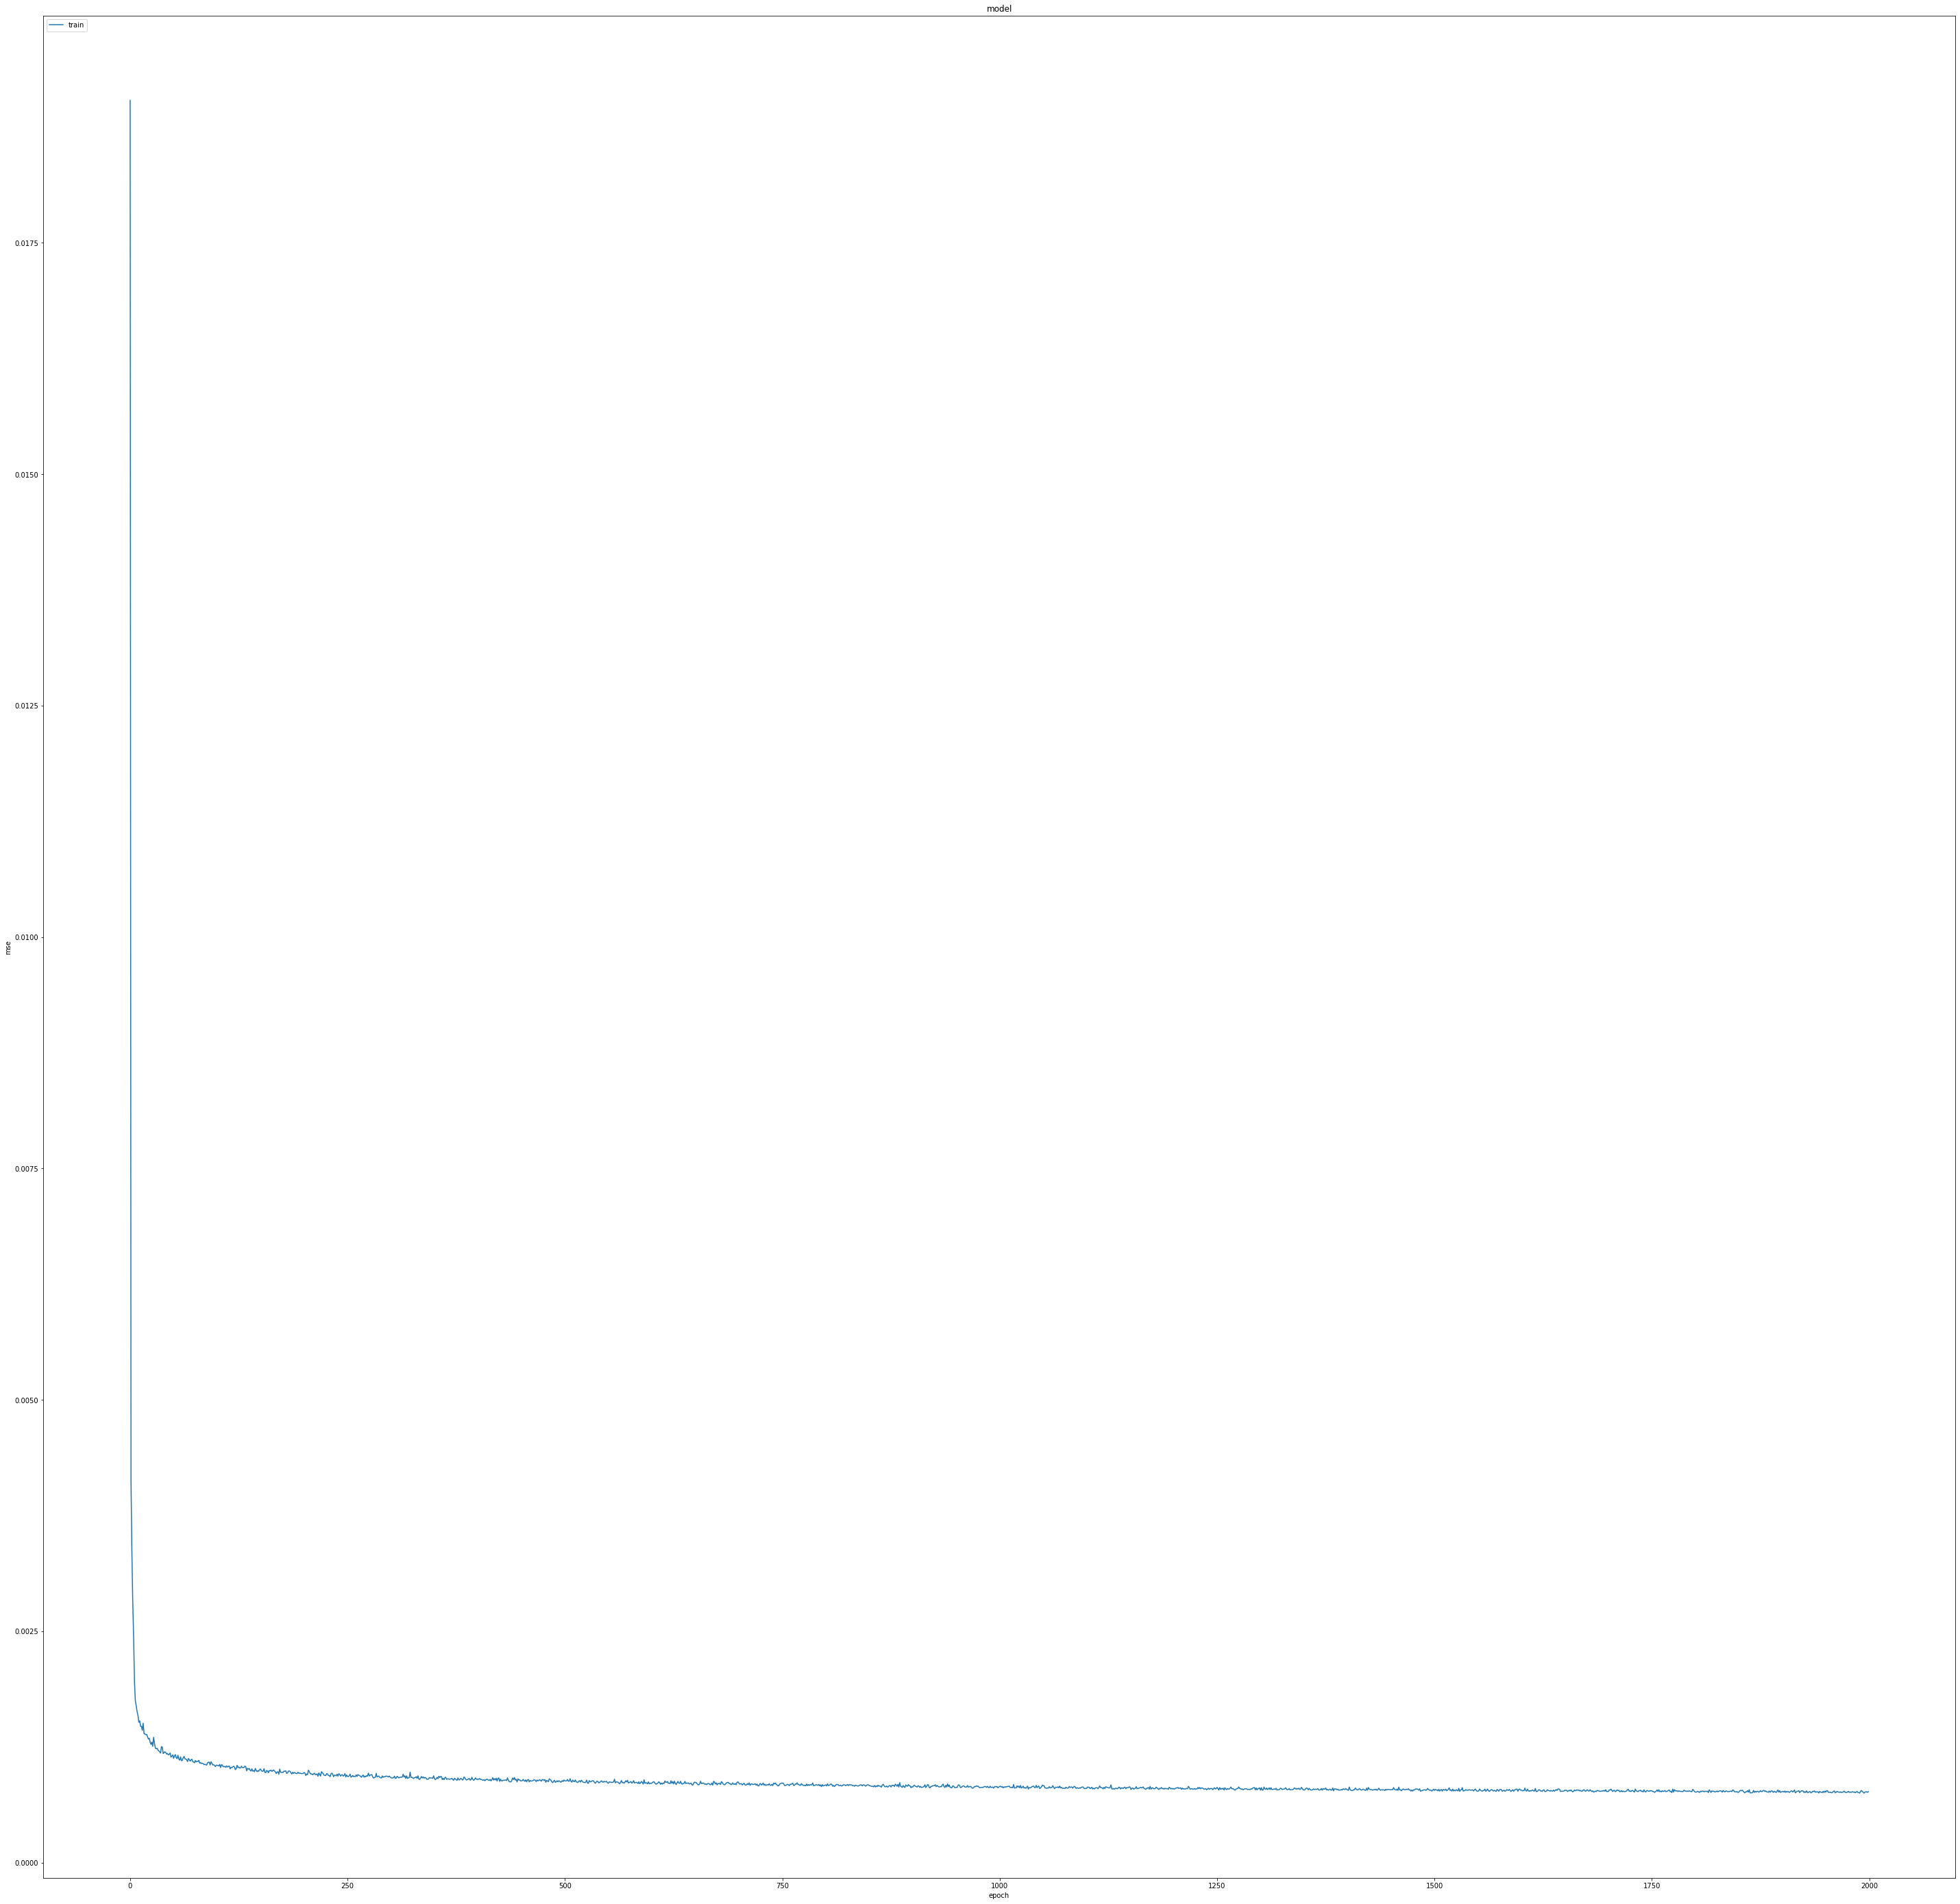

In [107]:
plt.plot(history.history['mse'])
plt.title('model')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.rcParams['figure.figsize'] = [50, 50]

plt.show()

In [108]:
Y_pred_test = model.predict(X_test)
Y_pred_train = model.predict(X_train)
error = mean_absolute_error(Y_test, Y_pred_test)
error_train = mean_absolute_error(Y_train, Y_pred_train)
print('MAE: %.3f' % error)
print('MAE_train: %.3f' % error_train)


MAE: 0.018
MAE_train: 0.019


In [109]:
model.save("model.h5")

# **Prediction**

---

**Preprocessing Test set**

In [110]:
def normalize_pred(df):
  result = df.copy()
  for feature in df.columns:
    max = MaxMinData[feature][0]
    min = MaxMinData[feature][1]
    result[feature] = (df[feature] - min) / (max - min)
  return result

In [111]:
dataset_test_path = '../Test/Final_Test.csv'
MaxMinData = pd.read_csv("MaxMinData")

dataset_test = pd.read_csv(dataset_test_path)
# subdata = subdata.drop('MOFname',axis=1)
# subdata["topology_code"] = pd.factorize(subdata.topology)[0]
# subdata["topology_code"] = subdata["topology_code"] + 1
# subdata = subdata.drop('topology',axis=1)
# subdata = normalize(subdata)

# subdata = subdata.drop('topology_code',axis=1)
# subdata = subdata.drop('functional_groups',axis=1)

# title = list(subdata.columns)
# title[10], title[12] = title[12], title[11]
# subdata = subdata[title]

dataset_test

,Unnamed: 0,MOFnumber,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,...,Ni,metal_type,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio
0,0,1,mof_unit_68614,1208.301332,797.70936,586.54,0.11392,0.1039,OEt,2,...,0,Cu,2,51.0,1.593750,6.250000,14.000000,0.190476,0.645714,0.142857
1,1,2,mof_unit_68615,4126.414623,3733.65779,852.49,0.21367,0.1422,H-I,4,...,0,Cr,6,164.0,1.822222,6.666667,8.666667,0.164557,0.566076,0.000000
2,2,3,mof_unit_68616,1602.148373,747.21048,3155.73,0.33883,0.4375,CN-OH,3,...,0,Zn,2,62.0,2.066667,6.666667,10.000000,0.266667,0.877333,0.600000
3,3,4,mof_unit_68617,2436.629312,995.80232,3521.09,0.40464,0.5963,OMe,2,...,0,Cu,2,80.0,1.818182,4.545455,16.000000,0.212766,0.714894,0.250000
4,4,5,mof_unit_68618,3123.418006,1337.53800,2678.46,0.38959,0.5479,NO2-Pr,3,...,0,Zn,2,87.0,2.071429,4.761905,28.000000,0.372881,1.228475,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,16995,16996,mof_unit_85609,32660.944610,4723.68288,5720.14,0.77614,3.2318,OH-NO2,3,...,0,Zn,12,370.0,1.778846,5.769231,12.666667,0.201923,0.686923,0.105263
16996,16996,16997,mof_unit_85610,5070.998617,1499.13262,4017.28,0.59192,1.2058,Me-OMe,3,...,0,Zn,6,89.0,1.679245,11.320755,9.000000,0.217742,0.749032,0.000000
16997,16997,16998,mof_unit_85611,4669.804446,1322.04892,4288.76,0.54950,1.1689,Me-CN,2,...,0,Cu,2,141.0,2.203125,3.125000,8.000000,0.250000,0.788571,2.500000
16998,16998,16999,mof_unit_85612,4682.120862,1213.51148,4331.86,0.60643,1.4091,OH-HCO,3,...,0,Zn,2,101.0,1.870370,3.703704,24.000000,0.250000,0.852308,0.083333


In [112]:
dataset_test = pd.read_csv(dataset_test_path)
dataset_test = dataset_test.drop('MOFname',axis=1)
# dataset_test = dataset_test.drop('topology',axis=1)
dataset_test = dataset_test.drop('MOFnumber',axis=1)
dataset_test = dataset_test.drop('Unnamed: 0',axis=1)
dataset_test = dataset_test.drop('functional_groups',axis=1)
dataset_test = dataset_test.drop('metal_type',axis=1)

In [113]:
topology = dataset_test["topology"].values
dataset_test["topology"] = topology
dataset_test = pd.get_dummies(dataset_test)
dataset_test

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,topology_bcu,topology_etb,topology_fof,topology_nbo,topology_pcu,topology_pts,topology_rht,topology_sra,topology_tbo,topology_the
0,1208.301332,797.70936,586.54,0.11392,0.1039,2,5,26,36.639791,7.005640,...,0,0,0,0,1,0,0,0,0,0
1,4126.414623,3733.65779,852.49,0.21367,0.1422,4,6,17,18.390691,5.119399,...,0,0,0,0,0,0,0,0,0,0
2,1602.148373,747.21048,3155.73,0.33883,0.4375,3,11,17,13.062850,5.045400,...,0,0,0,0,1,0,0,0,0,0
3,2436.629312,995.80232,3521.09,0.40464,0.5963,2,1,28,9.601198,5.106238,...,0,0,0,0,1,0,0,0,0,0
4,3123.418006,1337.53800,2678.46,0.38959,0.5479,3,8,19,12.974954,5.287639,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,32660.944610,4723.68288,5720.14,0.77614,3.2318,3,3,14,4.536626,3.146698,...,0,0,0,1,0,0,0,0,0,0
16996,5070.998617,1499.13262,4017.28,0.59192,1.2058,3,1,11,6.745508,3.658871,...,0,0,0,1,0,0,0,0,0,0
16997,4669.804446,1322.04892,4288.76,0.54950,1.1689,2,7,23,4.666206,3.593052,...,0,0,0,0,1,0,0,0,0,0
16998,4682.120862,1213.51148,4331.86,0.60643,1.4091,3,7,25,4.823305,3.454497,...,0,0,0,0,1,0,0,0,0,0


In [114]:
dataset_test = normalize_pred(dataset_test)
dataset_test = dataset_test.astype('float')

In [115]:
dataset_test

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,topology_bcu,topology_etb,topology_fof,topology_nbo,topology_pcu,topology_pts,topology_rht,topology_sra,topology_tbo,topology_the
0,0.085578,0.096814,0.152444,0.579186,0.096432,0.159091,0.140805,0.442529,0.115558,0.372494,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
1,0.096466,0.207238,0.183727,0.623589,0.101260,0.310606,0.155172,0.313218,0.098900,0.271365,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
2,0.087048,0.094915,0.454651,0.679303,0.138489,0.234848,0.227011,0.313218,0.094036,0.267397,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
3,0.090161,0.104265,0.497627,0.708598,0.158509,0.159091,0.083333,0.471264,0.090876,0.270659,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
4,0.092723,0.117118,0.398511,0.701899,0.152407,0.234848,0.183908,0.341954,0.093956,0.280385,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0.202926,0.244474,0.756295,0.873969,0.490765,0.234848,0.112069,0.270115,0.086253,0.165599,...,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
16996,0.099990,0.123195,0.555992,0.791964,0.235348,0.234848,0.083333,0.227011,0.088270,0.193059,...,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
16997,0.098493,0.116535,0.587926,0.773082,0.230696,0.159091,0.169540,0.399425,0.086372,0.189530,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333
16998,0.098539,0.112453,0.592995,0.798423,0.260978,0.234848,0.169540,0.428161,0.086515,0.182102,...,0.083333,0.083333,0.083333,0.083333,0.916667,0.083333,0.083333,0.083333,0.083333,0.083333


Predicting

In [116]:
from keras.models import load_model
import numpy as np

In [117]:
# model = load_model('/content/drive/MyDrive/Colab Notebooks/TMLCC/CleanOutput_1/modelv1.h5')

In [118]:
result = model.predict(dataset_test)
result
with np.printoptions(threshold=np.inf):
    print(result)

[[0.36481142]
 [0.2143426 ]
 [0.20576291]
 [0.19841072]
 [0.20414393]
 [0.19892274]
 [0.27833694]
 [0.34202814]
 [0.22095448]
 [0.31995407]
 [0.19672254]
 [0.20298305]
 [0.4016161 ]
 [0.36240053]
 [0.24347243]
 [0.2990527 ]
 [0.19715491]
 [0.19668461]
 [0.26706696]
 [0.21069542]
 [0.3579777 ]
 [0.2649238 ]
 [0.22253987]
 [0.22162214]
 [0.38916802]
 [0.27918524]
 [0.2538229 ]
 [0.40305808]
 [0.2062795 ]
 [0.20749837]
 [0.26034224]
 [0.22937265]
 [0.47897166]
 [0.2358432 ]
 [0.29101408]
 [0.21825874]
 [0.4172259 ]
 [0.2088762 ]
 [0.2152059 ]
 [0.3085948 ]
 [0.23747087]
 [0.23366149]
 [0.22452576]
 [0.37315708]
 [0.20406264]
 [0.2540459 ]
 [0.3887138 ]
 [0.29332852]
 [0.20326829]
 [0.21360622]
 [0.21977624]
 [0.24690834]
 [0.32752585]
 [0.22049236]
 [0.45650372]
 [0.22984014]
 [0.4433472 ]
 [0.23985001]
 [0.21083462]
 [0.28255266]
 [0.21529305]
 [0.21783295]
 [0.29377872]
 [0.27021173]
 [0.32921237]
 [0.2326537 ]
 [0.21724324]
 [0.25867945]
 [0.22505221]
 [0.21998882]
 [0.22122061]
 [0.23

Denormalization

In [119]:
def denormalization(input):
    result = []
    cap = MaxMinData['CO2_working_capacity [mL/g]'][0] - MaxMinData['CO2_working_capacity [mL/g]'][1]
    for i in range(len(input)):
        result.append(((input[i][0]*cap) + MaxMinData['CO2_working_capacity [mL/g]'][1]))
    return result

In [120]:
result = denormalization(result)
result

[219.29508010305398,
 78.39353454288299,
 70.35937166927495,
 63.474658667189786,
 68.84333022952045,
 63.95412170296957,
 138.31892087923887,
 197.9604331723508,
 84.5850138474455,
 177.28989857030234,
 61.89381625138215,
 67.75626734420204,
 253.75959921871583,
 217.03748330770787,
 105.6712012218175,
 157.7174921365202,
 62.29869676842726,
 61.85830408857957,
 127.76551540882649,
 74.97825519387122,
 212.895858134521,
 125.75863866897622,
 86.06960365067464,
 85.21022326455063,
 242.10301434116303,
 139.11327703013296,
 115.3635518622802,
 255.10989862712688,
 70.84311849050873,
 71.98448917057279,
 121.4683786988647,
 92.46793258250061,
 326.19665307959593,
 98.52706105634307,
 150.19000201085896,
 82.06067815067145,
 268.3768798540102,
 73.27470395303966,
 79.20194206821414,
 166.65288253819523,
 100.05123750235059,
 96.4840721446527,
 87.92922700975647,
 227.1101001409785,
 68.76721280394555,
 115.57238291473736,
 241.6776777020478,
 152.35729046920767,
 68.02336904179226,
 77.70

In [121]:
formatter = {"CO2_working_capacity [mL/g]":[],"id":[]}
for i in range(68614,85614):
    formatter['CO2_working_capacity [mL/g]'].append(result[i-68614])
    formatter['id'].append(str(i))

In [122]:
df_submission = pd.DataFrame(data=formatter)
id = df_submission['id'].values
output = df_submission['CO2_working_capacity [mL/g]'].values
submission = pd.DataFrame({"id": id,"CO2_working_capacity [mL/g]": output})

In [123]:
submission

,id,CO2_working_capacity [mL/g]
0,68614,219.295080
1,68615,78.393535
2,68616,70.359372
3,68617,63.474659
4,68618,68.843330
...,...,...
16995,85609,-7.517322
16996,85610,1.621987
16997,85611,3.247984
16998,85612,-1.461975


In [124]:
submission.to_csv("submission.csv", index=False)
!zip submission_07102021_6.zip submission.csv

'zip' is not recognized as an internal or external command,
operable program or batch file.
